<a href="https://colab.research.google.com/github/ipw0630/dbimbing_final_project/blob/main/Visualization_Pet_Adoption_Analized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install pyspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=3d79d74f445cb31d062231681c3e205934d4979d305dff97f59b10885392e769
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [5]:
! wget https://raw.githubusercontent.com/ipw0630/dbimbing_final_project/main/project_airflow/data/pet_adoption_data.csv

--2024-07-12 15:21:47--  https://raw.githubusercontent.com/ipw0630/dbimbing_final_project/main/project_airflow/data/pet_adoption_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135438 (132K) [text/plain]
Saving to: ‘pet_adoption_data.csv’

pet_adoption_data.c 100%[===================>] 132.26K  --.-KB/s    in 0.02s   

2024-07-12 15:21:47 (6.51 MB/s) - ‘pet_adoption_data.csv’ saved [135438/135438]



In [17]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
spark_session = SparkSession.builder.appName('petadoptionDF').master('local').getOrCreate()

In [18]:
pet_adoption_df = spark_session.read.csv('/content/pet_adoption_data.csv', header=True, inferSchema=True)
# Print the schema
pet_adoption_df.printSchema()

root
 |-- PetID: integer (nullable = true)
 |-- PetType: string (nullable = true)
 |-- Breed: string (nullable = true)
 |-- AgeMonths: integer (nullable = true)
 |-- Color: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- WeightKg: double (nullable = true)
 |-- Vaccinated: integer (nullable = true)
 |-- HealthCondition: integer (nullable = true)
 |-- TimeInShelterDays: integer (nullable = true)
 |-- AdoptionFee: integer (nullable = true)
 |-- PreviousOwner: integer (nullable = true)
 |-- AdoptionLikelihood: integer (nullable = true)



In [19]:
# Example transformation: Select specific columns
selected_df = pet_adoption_df.select("PetID", "PetType", "AdoptionLikelihood")

In [25]:
Vaccinated_df = pet_adoption_df.filter(col("Vaccinated") == 1)

In [21]:
transformed_df = pet_adoption_df.withColumn("IsSenior", col("AgeMonths") > 60)

In [22]:
# Show the transformed DataFrame
transformed_df.show()

+-----+-------+----------------+---------+------+------+------------------+----------+---------------+-----------------+-----------+-------------+------------------+--------+
|PetID|PetType|           Breed|AgeMonths| Color|  Size|          WeightKg|Vaccinated|HealthCondition|TimeInShelterDays|AdoptionFee|PreviousOwner|AdoptionLikelihood|IsSenior|
+-----+-------+----------------+---------+------+------+------------------+----------+---------------+-----------------+-----------+-------------+------------------+--------+
|  500|   Bird|        Parakeet|      131|Orange| Large| 5.039767822529515|         1|              0|               27|        140|            0|                 0|    true|
|  501| Rabbit|          Rabbit|       73| White| Large|16.086726854616735|         0|              0|                8|        235|            0|                 0|    true|
|  502|    Dog|Golden Retriever|      136|Orange|Medium|2.0762862789067658|         0|              0|               85|     

In [23]:
# Show selected DataFrame
selected_df.show()

+-----+-------+------------------+
|PetID|PetType|AdoptionLikelihood|
+-----+-------+------------------+
|  500|   Bird|                 0|
|  501| Rabbit|                 0|
|  502|    Dog|                 0|
|  503|   Bird|                 0|
|  504| Rabbit|                 0|
|  505|    Dog|                 0|
|  506|   Bird|                 0|
|  507|    Cat|                 1|
|  508|   Bird|                 0|
|  509|   Bird|                 0|
|  510|   Bird|                 0|
|  511| Rabbit|                 1|
|  512|    Dog|                 0|
|  513|    Cat|                 0|
|  514|    Cat|                 1|
|  515| Rabbit|                 0|
|  516|    Cat|                 0|
|  517|    Cat|                 1|
|  518| Rabbit|                 0|
|  519|    Dog|                 0|
+-----+-------+------------------+
only showing top 20 rows



In [27]:
# Show vaccinated pets DataFrame
Vaccinated_df.show()

+-----+-------+----------------+---------+------+------+------------------+----------+---------------+-----------------+-----------+-------------+------------------+
|PetID|PetType|           Breed|AgeMonths| Color|  Size|          WeightKg|Vaccinated|HealthCondition|TimeInShelterDays|AdoptionFee|PreviousOwner|AdoptionLikelihood|
+-----+-------+----------------+---------+------+------+------------------+----------+---------------+-----------------+-----------+-------------+------------------+
|  500|   Bird|        Parakeet|      131|Orange| Large| 5.039767822529515|         1|              0|               27|        140|            0|                 0|
|  506|   Bird|        Parakeet|      169| Brown| Small| 10.90261279164483|         1|              0|               70|        440|            1|                 0|
|  507|    Cat|         Siamese|       13|Orange| Large| 7.252683192048298|         1|              0|                3|        137|            0|                 1|
|  5

Visualizing Adoption Likelihood by Pet Type

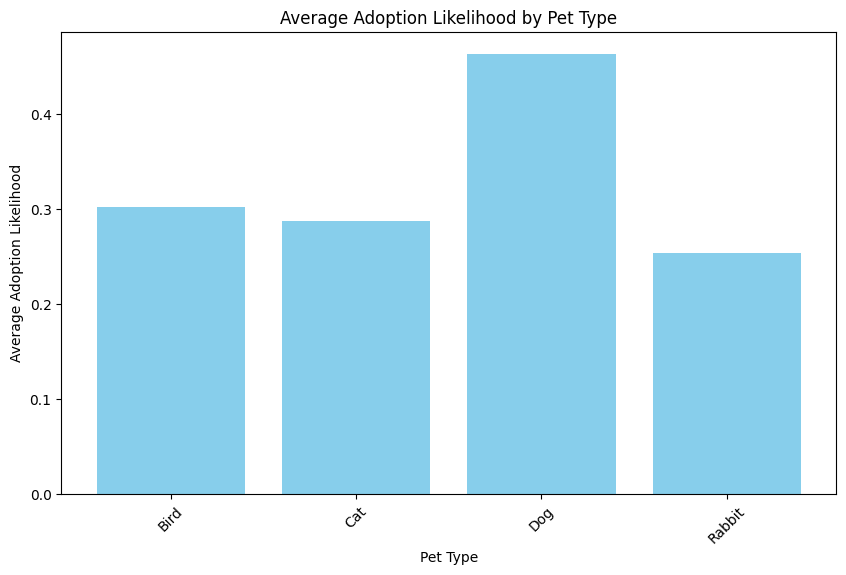

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame
pet_adoption_pd = pet_adoption_df.toPandas()

# Group by PetType and calculate average AdoptionLikelihood
adoption_by_type = pet_adoption_pd.groupby("PetType")["AdoptionLikelihood"].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(adoption_by_type["PetType"], adoption_by_type["AdoptionLikelihood"], color='skyblue')
plt.title('Average Adoption Likelihood by Pet Type')
plt.xlabel('Pet Type')
plt.ylabel('Average Adoption Likelihood')
plt.xticks(rotation=45)
plt.show()


Distribution of Adoption Fees

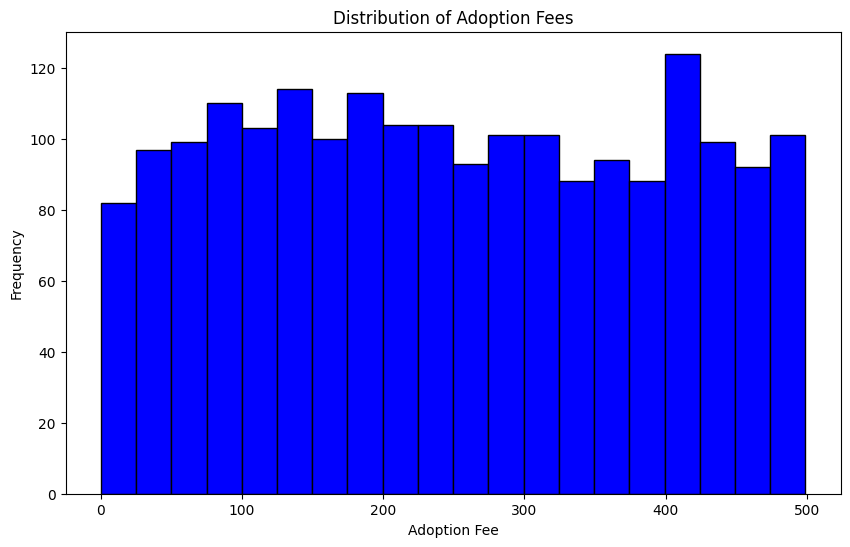

In [30]:
# Plotting the distribution of Adoption Fees
plt.figure(figsize=(10, 6))
plt.hist(pet_adoption_pd["AdoptionFee"], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Adoption Fees')
plt.xlabel('Adoption Fee')
plt.ylabel('Frequency')
plt.show()


Relationship Between Weight and Adoption Likelihood

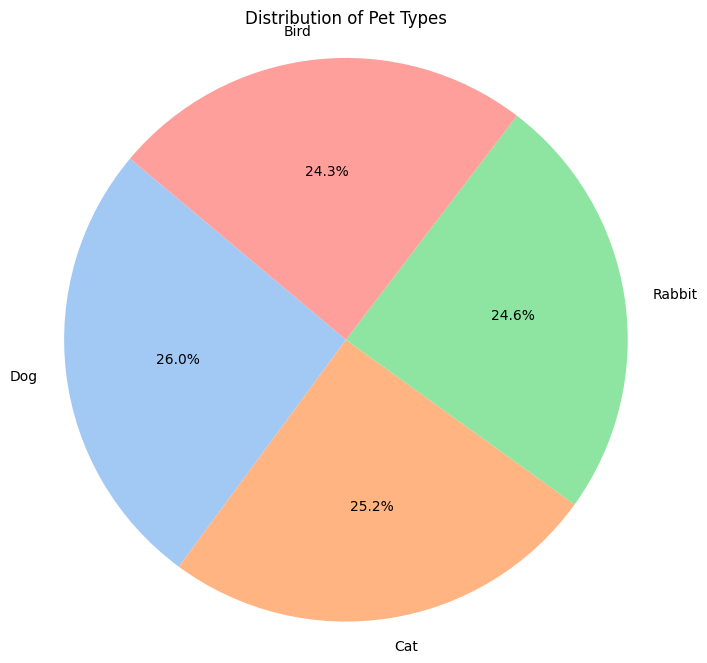

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame
pet_adoption_pd = pet_adoption_df.toPandas()

# Count the number of pets by type
pet_type_counts = pet_adoption_pd['PetType'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pet_type_counts, labels=pet_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Pet Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


Vaccination Status and Adoption Likelihood

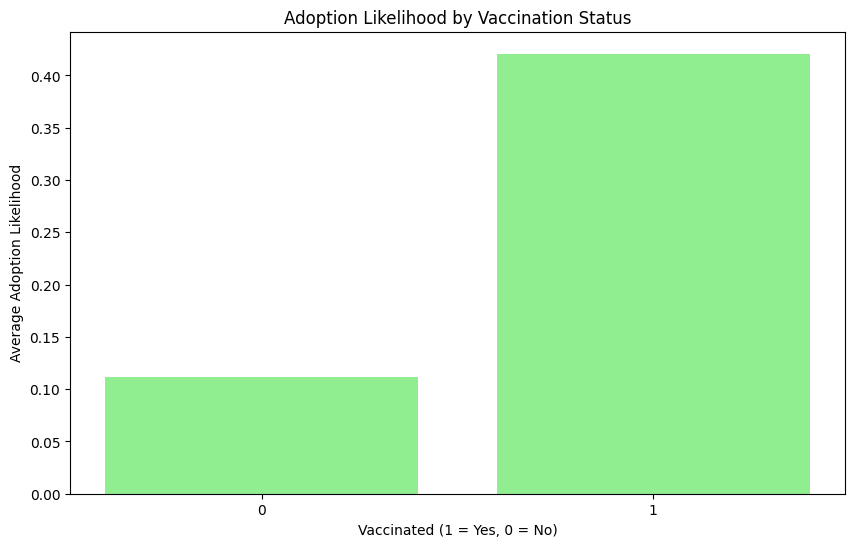

In [33]:
# Plotting the average adoption likelihood based on Vaccination status
vaccination_status = pet_adoption_pd.groupby("Vaccinated")["AdoptionLikelihood"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(vaccination_status["Vaccinated"].astype(str), vaccination_status["AdoptionLikelihood"], color='lightgreen')
plt.title('Adoption Likelihood by Vaccination Status')
plt.xlabel('Vaccinated (1 = Yes, 0 = No)')
plt.ylabel('Average Adoption Likelihood')
plt.xticks(rotation=0)
plt.show()
